In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('ous_data/data_preprocessed.csv')

In [4]:
df.shape

(27590, 41)

In [5]:
df.isna().sum()

IB3                         0
IH1                         0
IB2                         0
IH2                         0
IB1                         0
IH3                         0
IB4                         0
IH4                         0
IB5                         0
confusion                   0
careless_1                  0
careless_2                  0
careless_3                  0
technical_problems        361
native_language           422
Q_Lang                      0
religion_text             407
religion_1              23943
religion_2              23472
religion_3              27527
religion_4              26599
religion_5              27070
religion_6              22260
religion_7              23086
religion_8              26478
religion_9              27222
religion_10             26964
religion_11             27347
religion_12             24840
religion_13             24106
religion_14             27486
religion_15             27462
religion_16             26382
education_

In [6]:
df.columns

Index(['IB3', 'IH1', 'IB2', 'IH2', 'IB1', 'IH3', 'IB4', 'IH4', 'IB5',
       'confusion', 'careless_1', 'careless_2', 'careless_3',
       'technical_problems', 'native_language', 'Q_Lang', 'religion_text',
       'religion_1', 'religion_2', 'religion_3', 'religion_4', 'religion_5',
       'religion_6', 'religion_7', 'religion_8', 'religion_9', 'religion_10',
       'religion_11', 'religion_12', 'religion_13', 'religion_14',
       'religion_15', 'religion_16', 'education_leve', 'education_level_iran',
       'education_level_germ', 'age_1', 'sex', 'countr_origin_1', 'country3',
       'Age'],
      dtype='object')

In [33]:
df1 = df[['IB3', 'IH1', 'IB2', 'IH2', 'IB1', 'IH3', 'IB4', 'IH4', 'IB5',
        'native_language', 'Q_Lang',
       'religion_1', 'religion_2', 'religion_3', 'religion_4', 'religion_5',
       'religion_6', 'religion_7', 'religion_8', 'religion_9', 'religion_10',
       'religion_11', 'religion_12', 'religion_13', 'religion_14',
       'religion_15', 'religion_16', 'education_leve', 'sex', 'countr_origin_1', 'country3',
       'Age']]

In [34]:
df1.columns

Index(['IB3', 'IH1', 'IB2', 'IH2', 'IB1', 'IH3', 'IB4', 'IH4', 'IB5',
       'native_language', 'Q_Lang', 'religion_1', 'religion_2', 'religion_3',
       'religion_4', 'religion_5', 'religion_6', 'religion_7', 'religion_8',
       'religion_9', 'religion_10', 'religion_11', 'religion_12',
       'religion_13', 'religion_14', 'religion_15', 'religion_16',
       'education_leve', 'sex', 'countr_origin_1', 'country3', 'Age'],
      dtype='object')

In [ ]:
df1.groupby(['country3'])['Age'].count()

country3
ARE      80
ARG     252
AUS    1266
AUT     347
BGR     440
BRA     269
CAN     751
CHE     587
CHL      54
CHN    1694
COL     278
CZE     414
DEU    2507
DNK     495
ECU      46
ESP     257
FRA     945
GBR    1095
GRC     520
HRV     252
HUN     940
IND     511
IRN     240
ITA     502
JPN     399
KAZ     126
LBN      19
MEX      64
MKD     286
MYS     171
NLD     478
NZL     214
PAK     450
PER     142
PHL     314
POL    1414
PRT     742
ROU     759
RUS     428
SGP     102
SRB     542
SVK     563
THA      91
TUR    1599
USA    3623
Name: Age, dtype: int64

In [52]:
def analyze_questionnaire(df):
    
    plt.style.use('ggplot')
    
    fig = plt.figure(figsize=(20, 15))
    
    plt.subplot(2, 2, 1)

    df['age_group'] = pd.cut(df['Age'], bins=[0, 25, 35, 45, 55, 100], 
                            labels=['18-25', '26-35', '36-45', '46-55', '55+'])
    
    age_means = df.iloc[:, :9].groupby(df['age_group']).mean()
    
    sns.heatmap(age_means, cmap='YlOrRd', annot=True, fmt='.2f')
    plt.title('Average Responses by Age Group')
    plt.xlabel('Question Number')
    plt.ylabel('Age Group')
    
    plt.subplot(2, 2, 2)
    edu_means = df.iloc[:, :10].groupby(df['education_leve']).mean().T
    edu_means.plot(kind='bar', ax=plt.gca())
    plt.title('Response Patterns by Education Level')
    plt.xlabel('Question Number')
    plt.ylabel('Average Response')
    plt.legend(title='Education Level', bbox_to_anchor=(1.05, 1))
    plt.xticks(rotation=45)
    
    plt.subplot(2, 2, 3)
    top_countries = df['country3'].value_counts().nlargest(9).index
    country_data = df[df['country3'].isin(top_countries)]
    country_means = df.iloc[:, :10].groupby(df['country3']).mean()
    
    sns.boxplot(data=country_data.melt(id_vars=['country3'], value_vars=df.columns[:10]), 
                x='country3', y='value')
    plt.title('Response Distribution by Country (Top 10)')
    plt.xticks(rotation=45)
    plt.xlabel('Country')
    plt.ylabel('Response Value')
    
    plt.subplot(2, 2, 3)
    gender_means = df.iloc[:, :10].groupby(df['sex']).mean().T
    gender_means.plot(kind='line', marker='o')
    plt.title('Gender Comparison Across Questions')
    plt.xlabel('Question Number')
    plt.ylabel('Average Response')
    plt.legend(title='Gender')
    
    plt.tight_layout()
    
    return fig

/var/folders/l8/kn3s865x1215_zj8rfdf3hv80000gn/T/ipykernel_13075/2012044774.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age_group'] = pd.cut(df['Age'], bins=[0, 25, 35, 45, 55, 100],
/var/folders/l8/kn3s865x1215_zj8rfdf3hv80000gn/T/ipykernel_13075/2012044774.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_means = df.iloc[:, :9].groupby(df['age_group']).mean()


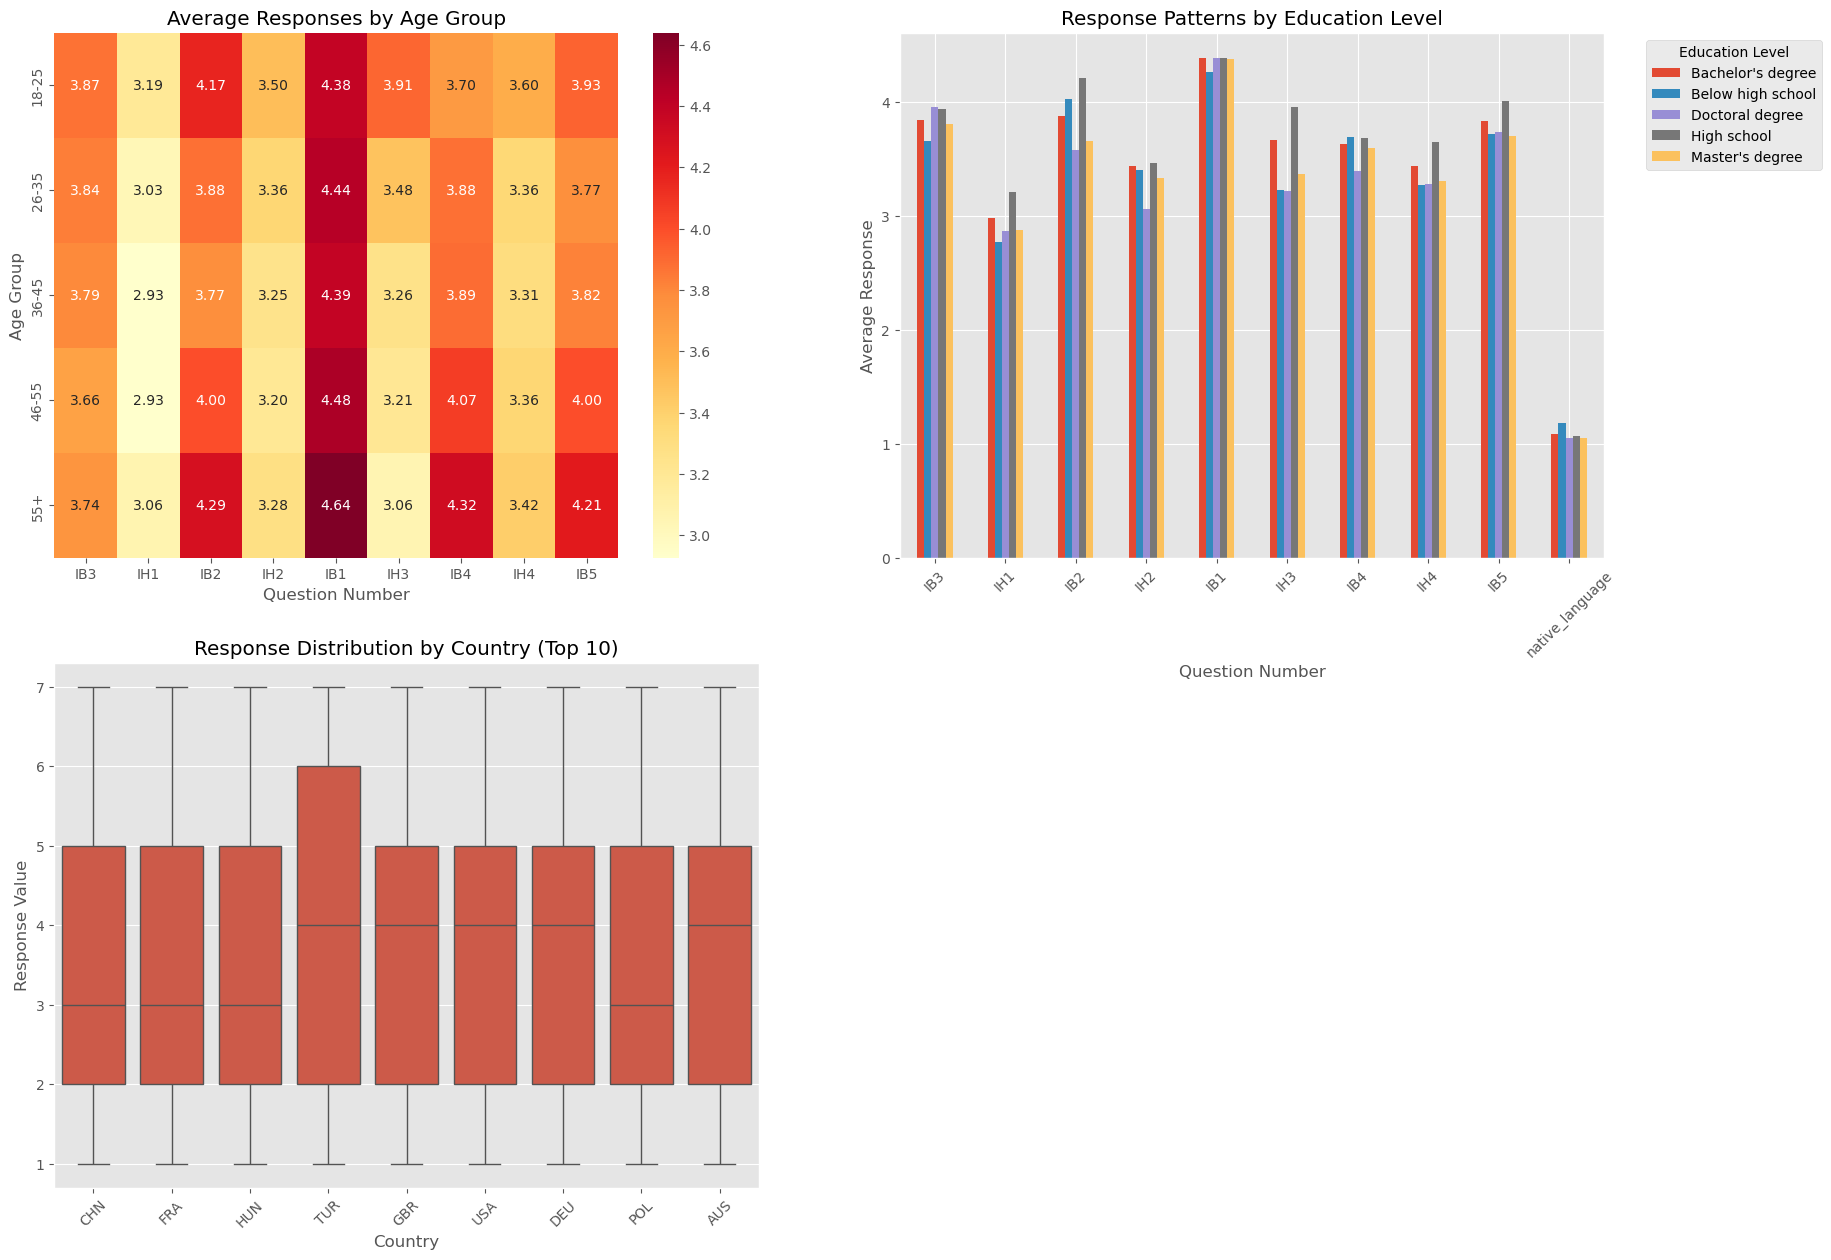

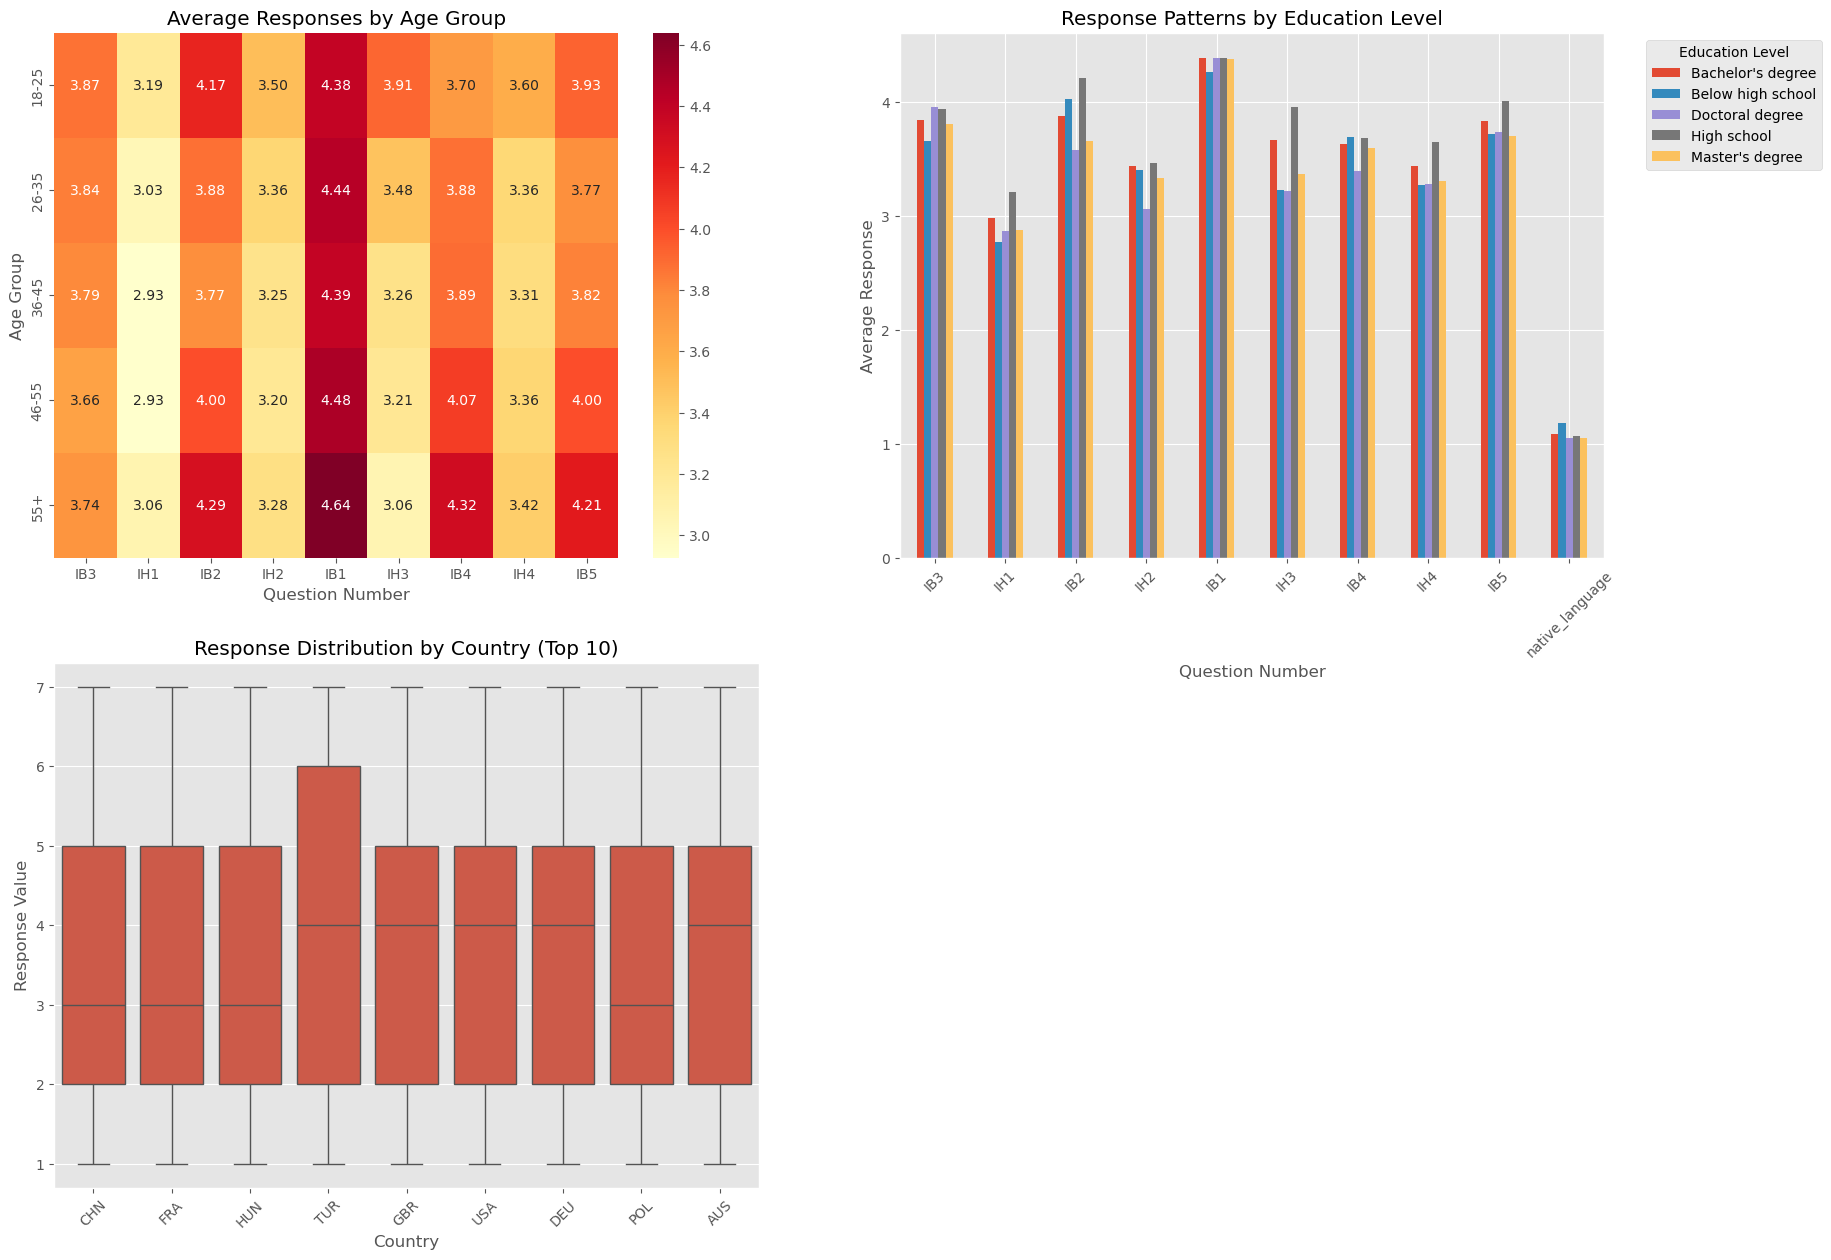

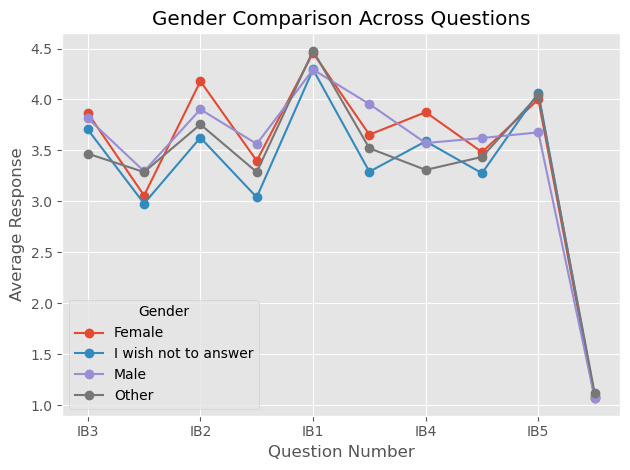

In [53]:
analyze_questionnaire(df1)